In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [54]:
ch_n  = pd.read_csv("../Data/Processed/ENEM2009/CR_regiaoN_CH.csv")
ch_ne = pd.read_csv("../Data/Processed/ENEM2009/CR_regiaoNE_CH.csv")
ch_se = pd.read_csv("../Data/Processed/ENEM2009/CR_regiaoSE_CH.csv")
ch_s  = pd.read_csv("../Data/Processed/ENEM2009/CR_regiaoS_CH.csv")
ch_co = pd.read_csv("../Data/Processed/ENEM2009/CR_regiaoCO_CH.csv")
ch_all = pd.read_csv("../Data/Processed/ENEM2009/Concluintes_regulares_CH.csv")

In [128]:
print(f"Geral        - Média: {ch_all['NU_NOTA_CH'].mean():.2f};   Std: {ch_all['NU_NOTA_CH'].std():.2f}")
print(f"Norte        - Média: {ch_n['NU_NOTA_CH'].mean():.2f};   Std: {ch_n['NU_NOTA_CH'].std():.2f}")
print(f"Nordeste     - Média: {ch_ne['NU_NOTA_CH'].mean():.2f};   Std: {ch_ne['NU_NOTA_CH'].std():.2f}")
print(f"Sudeste      - Média: {ch_se['NU_NOTA_CH'].mean():.2f};   Std: {ch_se['NU_NOTA_CH'].std():.2f}")
print(f"Sul          - Média: {ch_s['NU_NOTA_CH'].mean():.2f};   Std: {ch_s['NU_NOTA_CH'].std():.2f}")
print(f"Centro-Oeste - Média: {ch_co['NU_NOTA_CH'].mean():.2f};   Std: {ch_co['NU_NOTA_CH'].std():.2f}")

Geral        - Média: 500.03;   Std: 100.02
Norte        - Média: 469.62;   Std: 89.31
Nordeste     - Média: 479.71;   Std: 96.91
Sudeste      - Média: 514.98;   Std: 102.02
Sul          - Média: 509.95;   Std: 96.09
Centro-Oeste - Média: 499.68;   Std: 98.90


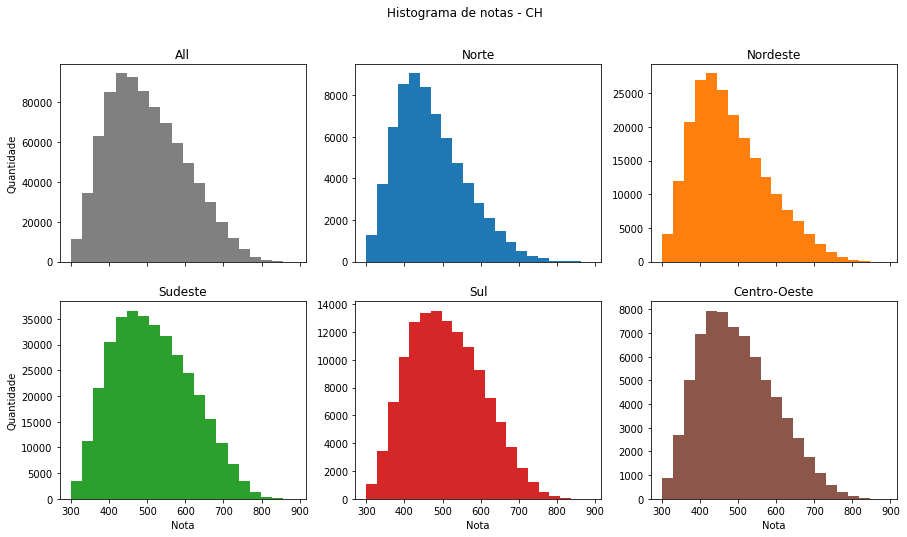

In [112]:
fig, axs = plt.subplots(2, 3, figsize=(15,8), sharex=True)#, sharey=True)

fig.suptitle('Histograma de notas - CH')

axs[0,0].hist(ch_all['NU_NOTA_CH'], bins=20, label="All", color='gray')
axs[0,0].set_title("All")
axs[0,1].hist(ch_n['NU_NOTA_CH'], bins=20, label="N", color='tab:blue')
axs[0,1].set_title("Norte")
axs[0,2].hist(ch_ne['NU_NOTA_CH'], bins=20, label="NE", color='tab:orange')
axs[0,2].set_title("Nordeste")
axs[1,0].hist(ch_se['NU_NOTA_CH'], bins=20, label="SE", color='tab:green')
axs[1,0].set_title("Sudeste")
axs[1,1].hist(ch_s['NU_NOTA_CH'], bins=20, label="S", color='tab:red')
axs[1,1].set_title("Sul")
axs[1,2].hist(ch_co['NU_NOTA_CH'], bins=20, label="CO", color='tab:brown')
axs[1,2].set_title("Centro-Oeste")

axs[1,0].set_xlabel('Nota')
axs[1,1].set_xlabel('Nota')
axs[1,2].set_xlabel('Nota')

axs[0,0].set_ylabel('Quantidade')
axs[1,0].set_ylabel('Quantidade')

plt.show()

In [22]:
questoes_list = list(ch_n.columns[2:])
questoes_list

['Item 58083',
 'Item 58114',
 'Item 58520',
 'Item 58533',
 'Item 58536',
 'Item 58726',
 'Item 58778',
 'Item 60181',
 'Item 60182',
 'Item 60183',
 'Item 60184',
 'Item 60185',
 'Item 60186',
 'Item 60187',
 'Item 60188',
 'Item 60189',
 'Item 60190',
 'Item 60191',
 'Item 60192',
 'Item 60193',
 'Item 60194',
 'Item 60195',
 'Item 60196',
 'Item 60197',
 'Item 60198',
 'Item 60199',
 'Item 60200',
 'Item 60201',
 'Item 60202',
 'Item 60203',
 'Item 60204',
 'Item 60205',
 'Item 60206',
 'Item 60207',
 'Item 60208',
 'Item 60209',
 'Item 60210',
 'Item 60211',
 'Item 60212',
 'Item 60215',
 'Item 60217',
 'Item 60219',
 'Item 60223',
 'Item 60224',
 'Item 60225']

In [56]:
comp = 'CH'
nota_min=300
nota_max=800
step=20

bins = np.arange(nota_min,nota_max,step)

# N
ch_n['RangeCH'] = pd.cut(ch_n['NU_NOTA_'+comp], bins, right=False)

bin_n = ch_n[ch_n['NU_NOTA_'+comp]!=0].groupby('RangeCH').count()[['NU_INSCRICAO']]
bin_n = bin_n.rename(columns={'NU_INSCRICAO': 'Total'})
bin_n = bin_n.join(ch_n[ch_n['NU_NOTA_'+comp]!=0].groupby('RangeCH').sum()[questoes_list])

for q in questoes_list:
    bin_n[q] = bin_n[q]/bin_n['Total']
    
# NE
ch_ne['RangeCH'] = pd.cut(ch_ne['NU_NOTA_'+comp], bins, right=False)

bin_ne = ch_ne[ch_ne['NU_NOTA_'+comp]!=0].groupby('RangeCH').count()[['NU_INSCRICAO']]
bin_ne = bin_ne.rename(columns={'NU_INSCRICAO': 'Total'})
bin_ne = bin_ne.join(ch_ne[ch_ne['NU_NOTA_'+comp]!=0].groupby('RangeCH').sum()[questoes_list])

for q in questoes_list:
    bin_ne[q] = bin_ne[q]/bin_ne['Total']
    
# SE
ch_se['RangeCH'] = pd.cut(ch_se['NU_NOTA_'+comp], bins, right=False)

bin_se = ch_se[ch_se['NU_NOTA_'+comp]!=0].groupby('RangeCH').count()[['NU_INSCRICAO']]
bin_se = bin_se.rename(columns={'NU_INSCRICAO': 'Total'})
bin_se = bin_se.join(ch_se[ch_se['NU_NOTA_'+comp]!=0].groupby('RangeCH').sum()[questoes_list])

for q in questoes_list:
    bin_se[q] = bin_se[q]/bin_se['Total']
    
# S
ch_s['RangeCH'] = pd.cut(ch_s['NU_NOTA_'+comp], bins, right=False)

bin_s = ch_s[ch_s['NU_NOTA_'+comp]!=0].groupby('RangeCH').count()[['NU_INSCRICAO']]
bin_s = bin_s.rename(columns={'NU_INSCRICAO': 'Total'})
bin_s = bin_s.join(ch_s[ch_s['NU_NOTA_'+comp]!=0].groupby('RangeCH').sum()[questoes_list])

for q in questoes_list:
    bin_s[q] = bin_s[q]/bin_s['Total']
    
# CO
ch_co['RangeCH'] = pd.cut(ch_co['NU_NOTA_'+comp], bins, right=False)

bin_co = ch_co[ch_co['NU_NOTA_'+comp]!=0].groupby('RangeCH').count()[['NU_INSCRICAO']]
bin_co = bin_co.rename(columns={'NU_INSCRICAO': 'Total'})
bin_co = bin_co.join(ch_co[ch_co['NU_NOTA_'+comp]!=0].groupby('RangeCH').sum()[questoes_list])

for q in questoes_list:
    bin_co[q] = bin_co[q]/bin_co['Total']
    
# CO
ch_all['RangeCH'] = pd.cut(ch_all['NU_NOTA_'+comp], bins, right=False)

bin_all = ch_all[ch_all['NU_NOTA_'+comp]!=0].groupby('RangeCH').count()[['NU_INSCRICAO']]
bin_all = bin_all.rename(columns={'NU_INSCRICAO': 'Total'})
bin_all = bin_all.join(ch_all[ch_all['NU_NOTA_'+comp]!=0].groupby('RangeCH').sum()[questoes_list])

for q in questoes_list:
    bin_all[q] = bin_all[q]/bin_all['Total']

In [130]:
auc_reg = pd.DataFrame()
auc_reg['AUC_All'] = bin_all[questoes_list].sum()
auc_reg['AUC_N']  = bin_n[questoes_list].sum()
auc_reg['AUC_NE'] = bin_ne[questoes_list].sum()
auc_reg['AUC_SE'] = bin_se[questoes_list].sum()
auc_reg['AUC_S']  = bin_s[questoes_list].sum()
auc_reg['AUC_CO'] = bin_co[questoes_list].sum()

auc_reg

,AUC_All,AUC_N,AUC_NE,AUC_SE,AUC_S,AUC_CO
Item 58083,13.145705,13.318016,12.977007,13.325431,12.934058,13.069182
Item 58114,13.799296,13.684905,13.611382,13.963995,13.798948,13.741875
Item 58520,7.983208,7.935049,8.201337,8.003534,7.684838,8.046184
Item 58533,6.888443,6.803470,6.655190,7.083619,6.601628,7.004445
Item 58536,10.555064,10.642289,10.504533,10.635750,10.514064,10.423389
Item 58726,11.403108,11.289593,11.365825,11.406473,11.582222,11.402473
Item 58778,7.666377,7.692508,7.457057,7.723429,7.822290,7.696552
Item 60181,8.725112,8.768077,8.931582,8.626285,8.825985,8.686704
Item 60182,16.396117,16.489537,16.573663,16.302113,16.270891,16.345977
Item 60183,7.827460,8.726243,8.039391,7.794182,7.400195,7.622287


In [63]:
auc_reg.diff(axis=1).abs().max(axis=1).sort_values()

Item 60189    0.051723
Item 60193    0.107916
Item 60188    0.119881
Item 58536    0.137755
Item 60192    0.148541
Item 60199    0.167942
Item 58726    0.179749
Item 60215    0.242978
Item 60195    0.248509
Item 60196    0.250865
Item 60190    0.263691
Item 58778    0.266372
Item 60209    0.271286
Item 60182    0.271550
Item 60185    0.272564
Item 60224    0.283672
Item 60223    0.298250
Item 60202    0.298445
Item 60181    0.305297
Item 60191    0.332227
Item 60203    0.332364
Item 60219    0.339670
Item 58114    0.352613
Item 60198    0.357865
Item 58520    0.361346
Item 60210    0.363245
Item 60194    0.366510
Item 60184    0.371648
Item 60197    0.381562
Item 58083    0.391373
Item 60211    0.406937
Item 60217    0.419995
Item 60186    0.430287
Item 60225    0.477769
Item 58533    0.481990
Item 60207    0.486742
Item 60208    0.534214
Item 60200    0.558693
Item 60204    0.585486
Item 60212    0.598807
Item 60206    0.733496
Item 60187    0.819522
Item 60183    0.898783
Item 60201 

<AxesSubplot:title={'center':'Proporção de acertos por nota para cada região - Item 60201'}, xlabel='Nota', ylabel='Proporção de acertos'>

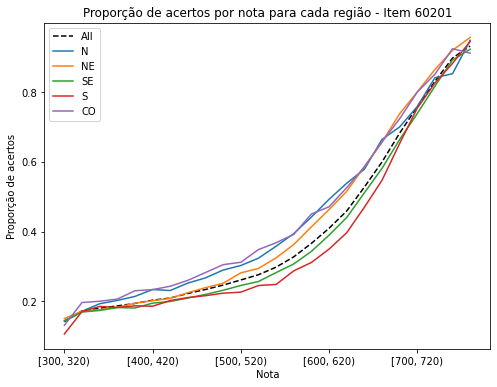

In [134]:
item = 'Item 60201'

bin_item = bin_all[[item]]
bin_item = bin_item.rename(columns={item: 'All'})
bin_item['N']  = bin_n[item]
bin_item['NE'] = bin_ne[item]
bin_item['SE'] = bin_se[item]
bin_item['S']  = bin_s[item]
bin_item['CO'] = bin_co[item]

bin_item.plot(figsize=(8,6), style=['k--'],
              title='Proporção de acertos por nota para cada região - '+item,
              xlabel='Nota', ylabel='Proporção de acertos')

In [ ]:
item = 'Item 60205'

bin_item = bin_all[[item]]
bin_item = bin_item.rename(columns={item: 'All'})
bin_item['N']  = bin_n[item]
bin_item['NE'] = bin_ne[item]
bin_item['SE'] = bin_se[item]
bin_item['S']  = bin_s[item]
bin_item['CO'] = bin_co[item]

bin_item.plot(figsize=(8,6), style=['k--'],
              title='Proporção de acertos por nota para cada região - '+item,
              xlabel='Nota', ylabel='Proporção de acertos')

<AxesSubplot:title={'center':'Proporção de acertos por nota para cada região - Item 60205'}, xlabel='Nota', ylabel='Proporção de acertos'>

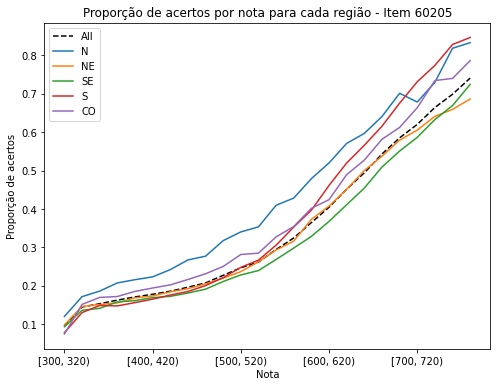

In [71]:
item = 'Item 60205'

bin_item = bin_all[[item]]
bin_item = bin_item.rename(columns={item: 'All'})
bin_item['N']  = bin_n[item]
bin_item['NE'] = bin_ne[item]
bin_item['SE'] = bin_se[item]
bin_item['S']  = bin_s[item]
bin_item['CO'] = bin_co[item]

bin_item.plot(figsize=(8,6), style=['k--'],
              title='Proporção de acertos por nota para cada região - '+item,
              xlabel='Nota', ylabel='Proporção de acertos')